# Aula 1

### Parte 1

In [4]:
import pandas as pd

ratings_path = "F:/Git/data-science/aprendizado/datasets/ml-latest-small/ratings.csv"
notas = pd.read_csv(ratings_path)
notas.head() # mostra as 5 primeiras tuplas da tabela


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
notas.shape # mostra o formato da tabela no formato (qtd linhas, qtd colunas)

(100836, 4)

In [18]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"] # o pandas tem o attr columns que permite que eu redefina os nomes das colunas
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [19]:
notas['nota'] # listando todos os valores da coluna 'notas'. Devolve um obj do tipo series

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [20]:
notas['nota'].unique() # apresenta todos os valores distintos da coluna notas

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [21]:
notas['nota'].value_counts() # apresenta a qtd de cada nota dada e já ordenou do mais frequente para o menos frequente

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [22]:
notas['nota'].mean() # média de todas as notas

3.501556983616962

### Parte 2

<AxesSubplot:ylabel='Frequency'>

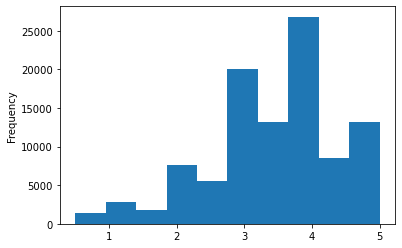

In [30]:
notas.nota.plot(kind='hist') # o método plot gera um gráfico base com os os dados. Ele aceita o parâmetro kind (tipo da visualização).
# o tipo hist (histograma) gera um gráfico de barras
# é possível acessar a tabela como attr de um objeto com o operador .

In [33]:
notas.nota.median() # buscando a mediana das notas

3.5

In [36]:
notas.nota.describe() # apresenta uma série de descrições a respeito dos dados em questão. No caso, da coluna nota.

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

### Utilizando a biblioteca seaborn para gerar visualizações também

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

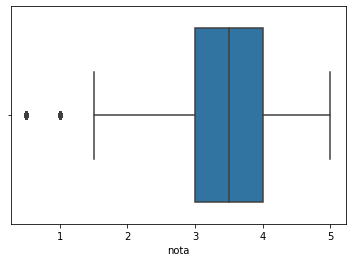

In [41]:
import seaborn as sns

sns.boxplot(notas.nota)

In [51]:
filmes_path = "F:/Git/data-science/aprendizado/datasets/ml-latest-small/movies.csv"
filmes = pd.read_csv(filmes_path)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [55]:
notas.query("filmeId==1") # É possível fazer queries/perguntas no pandas
# No caso, ele busca todas as informações relativas ao filme 1

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


### Analisando algumas notas específicas por filme

In [58]:
notas.query("filmeId==1").nota.mean() # Buscando a média das notas dadas ao filme 1

3.9209302325581397

In [59]:
notas.query("filmeId==2").nota.mean() # Media relativa ao filme 2

3.4318181818181817

In [63]:
grupo_notas_por_filme = notas.groupby("filmeId") # Agrupando pelas notas. Note que retorna um obj do tipo DataFrameGroupBy
grupo_notas_por_filme

In [68]:
medias_por_filme = grupo_notas_por_filme.mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

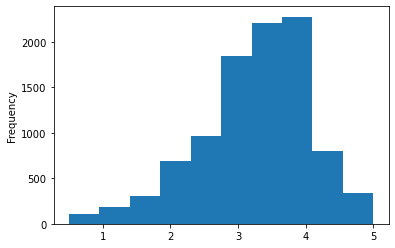

In [72]:
medias_por_filme.plot(kind='hist')

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

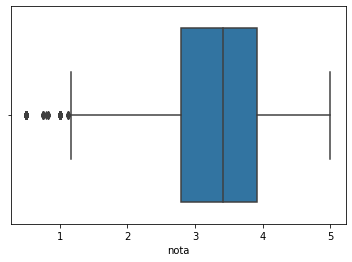

In [75]:
sns.boxplot(medias_por_filme)

In [77]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

F:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

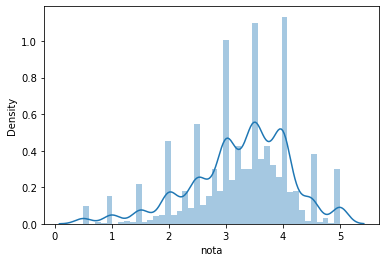

In [81]:
sns.distplot(medias_por_filme) # Gráfico de distribuição no seaborn

### utilizando a biblioteca matplotlib 

'\nManeira mais baixo nível sem utilizar nenhuma biblioteca para gerar gráficos, visto que\nas bibliotecas utilizam a matplotlib por baixo dos panos\n'

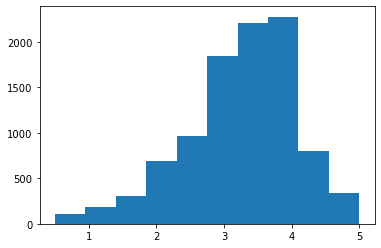

In [83]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme) # método para gerar histogramas
"""
Maneira mais baixo nível sem utilizar nenhuma biblioteca para gerar gráficos, visto que
as bibliotecas utilizam a matplotlib por baixo dos panos
""" 

Text(0.5, 1.0, 'Histograma das médias dos filmes')

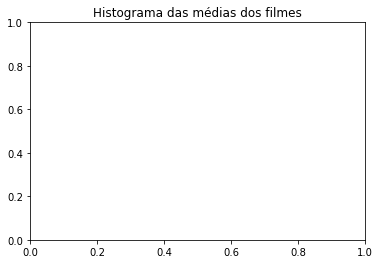

In [85]:
plt.title("Histograma das médias dos filmes") # Setando o titulo do gráfico

<AxesSubplot:ylabel='nota'>

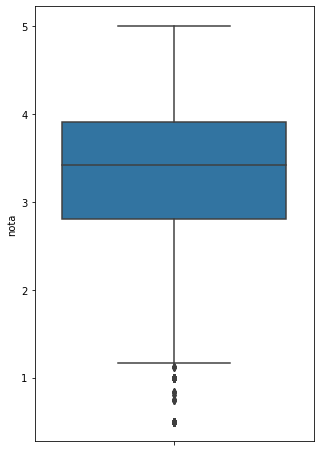

In [87]:
plt.figure(figsize=(5,8)) # É possível utilizar o pyplot para configurar os gráficos gerados no seaborn por exemplo
sns.boxplot(y=medias_por_filme) # É possível config o eixo do boxplot

### Parte 3